In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import numpy.linalg as lnalg
import xgboost as xgb

<h2>Load Dataset</h2>

In [168]:
# load the dataset
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

<h2>Data Transformation</h2>

In [169]:
labelencoder = LabelEncoder()
label_edit = ['job_level', 'person_level', 'marital_status_maried(Y/N)', 'Education_level']

for i in label_edit:
    data_train[i] = labelencoder.fit_transform(data_train[i])
    
for i in label_edit:
    data_test[i] = labelencoder.fit_transform(data_test[i])

In [170]:
data_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,1,1.352775,2,1.352775,1.732051,RM_type_A,2,1985,1,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,1,1.292285,2,1.292285,1.039230,RM_type_A,2,1989,1,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,2,2.565151,5,2.308679,1.780449,RM_type_C,1,1970,1,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,2,2.828427,5,1.000000,1.385641,RM_type_A,2,1967,1,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,2,2.828427,5,2.828427,0.707107,RM_type_A,2,1965,1,3,...,1985,30,9,8,2,3,0,47.18,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,1,1.256981,2,1.256981,1.224745,RM_type_A,2,1986,1,1,...,2016,4,3,3,0,4,1,50.87,0.0,0
11149,1,1.385641,2,1.385641,1.802776,RM_type_B,1,1988,1,2,...,2015,3,1,2,0,6,0,79.91,0.0,0
11150,1,1.256981,2,1.256981,1.385641,RM_type_B,2,1991,1,0,...,2017,2,1,2,0,4,0,78.38,0.0,0
11151,1,1.118034,2,1.118034,0.000000,RM_type_A,1,1987,1,1,...,2012,5,5,4,0,4,1,85.94,1.0,0


In [171]:
data_test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,1,1.256981,2,1.256981,0.707107,RM_type_A,1,1988,0,0,...,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,1,1.224745,2,1.224745,1.256981,RM_type_B,2,1991,0,0,...,3.31,2014,2,2,2,0,1,0,63.74,0.0
2,1,0.500000,2,0.500000,1.081665,RM_type_A,2,1989,1,1,...,3.44,2011,4,2,2,0,2,1,88.19,1.0
3,1,1.256981,2,1.256981,1.802776,RM_type_A,2,1990,1,1,...,0.00,2014,3,1,3,0,3,0,25.94,0.0
4,1,1.352775,2,1.352775,1.224745,RM_type_B,1,1985,1,0,...,3.34,2007,5,3,2,0,3,0,82.32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,1.292285,2,1.292285,0.707107,RM_type_B,2,1988,1,0,...,3.01,2015,2,2,2,0,4,0,58.60,0.0
5996,1,1.352775,2,1.352775,1.581139,RM_type_A,2,1989,1,1,...,3.56,2011,5,3,2,7,3,0,90.64,3.0
5997,1,1.385641,2,1.385641,1.224745,RM_type_A,2,1991,1,0,...,3.59,2013,3,2,3,0,16,0,13.02,0.0
5998,2,1.385641,4,1.385641,0.648074,RM_type_A,2,1980,1,2,...,2.93,2003,14,7,6,8,2,0,82.26,0.0


In [172]:
data_train = pd.get_dummies(data_train, columns=['Employee_type'], prefix='Employee_type')
data_test = pd.get_dummies(data_test, columns=['Employee_type'], prefix='Employee_type')

In [173]:
data_train.loc[data_train['GPA'] > 4.00, 'GPA'] = np.nan
data_train['GPA'].replace(to_replace=0.00, method='ffill', inplace=True)
data_train['GPA'] = data_train['GPA'].fillna(data_train['GPA'].mean())

data_test.loc[data_test['GPA'] > 4.00, 'GPA'] = np.nan
data_test['GPA'].replace(to_replace=0.00, method='ffill', inplace=True)
data_test['GPA'] = data_test['GPA'].fillna(data_test['GPA'].mean())

In [174]:
data_test.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
Employee_type_RM_type_A                  0
Employee_type_RM_type_B                  0
Employee_type_RM_type_C                  0
dtype: int6

In [175]:
data_train.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
Best Performance                         0
Employee_type_RM_type_A                  0
Employee_type_RM_type_B                  0
Employee_ty

In [176]:
fill_columns = ['Last_achievement_%', 'Achievement_above_100%_during3quartal']

for i in fill_columns:
    data_train[i] = data_train[i].fillna(method='ffill')

In [177]:
year = 2021
data_train['age'] = year - data_train['age']
data_test['age'] = year - data_test['age']

<h2>Manual Feature Selection</h2>

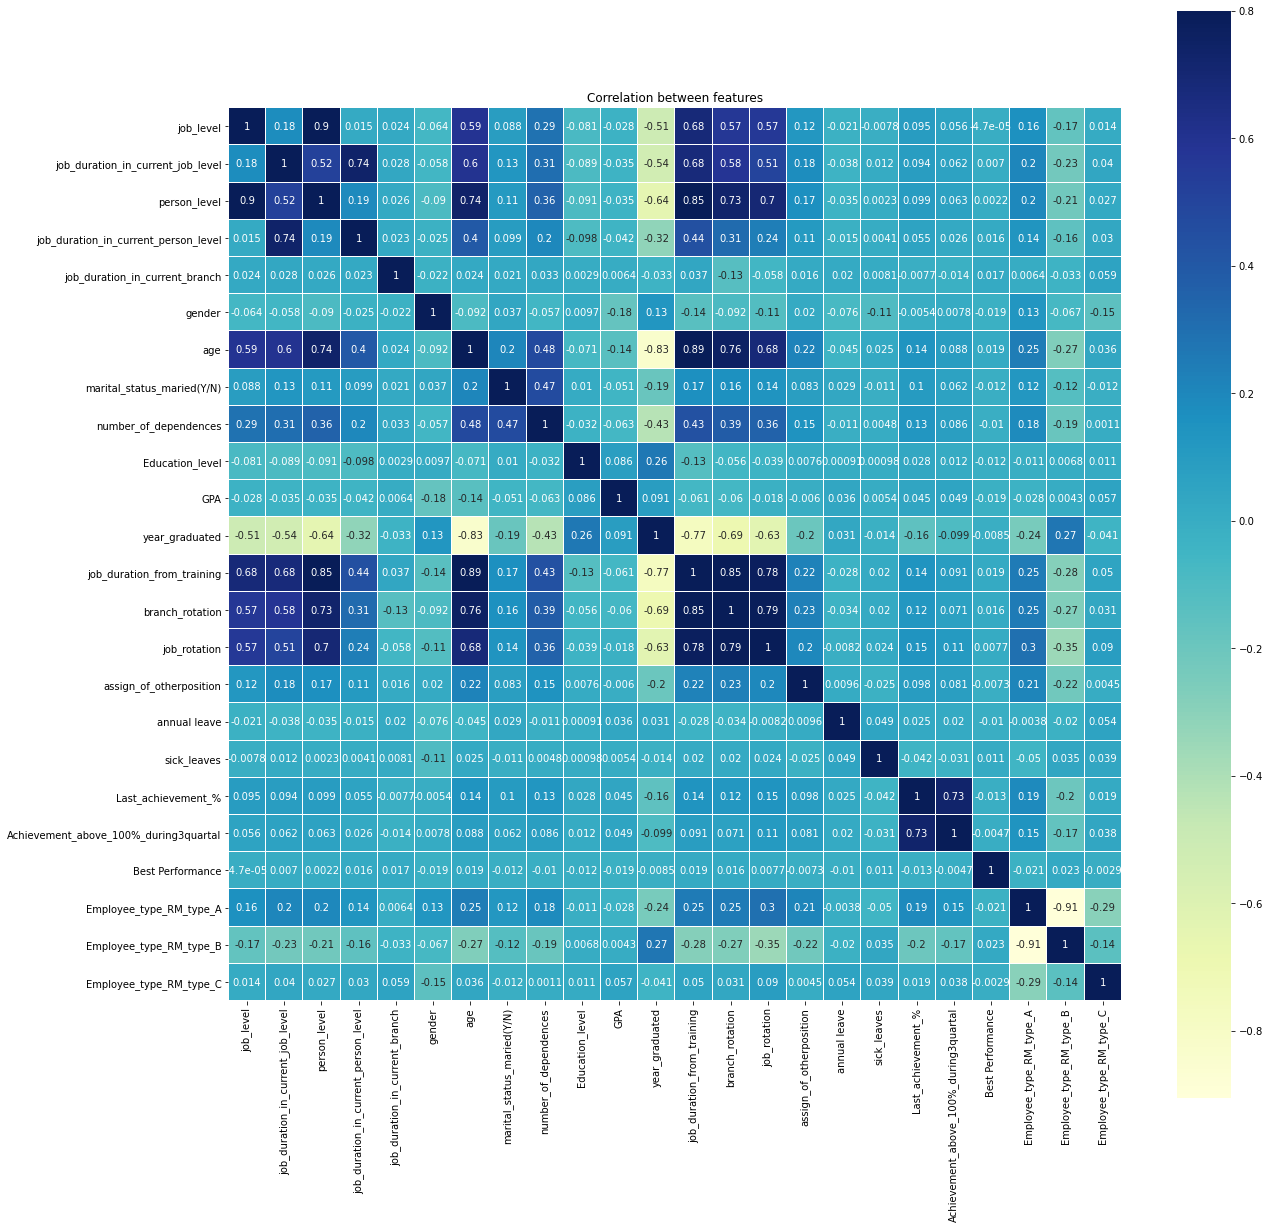

In [178]:
corr=data_train.corr()#["survived"]
plt.figure(figsize=(20, 20))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [179]:
corr.iloc[20]

job_level                               -0.000047
job_duration_in_current_job_level        0.006968
person_level                             0.002244
job_duration_in_current_person_level     0.016159
job_duration_in_current_branch           0.017283
gender                                  -0.019048
age                                      0.018997
marital_status_maried(Y/N)              -0.012500
number_of_dependences                   -0.009967
Education_level                         -0.012464
GPA                                     -0.019121
year_graduated                          -0.008495
job_duration_from_training               0.019229
branch_rotation                          0.016063
job_rotation                             0.007690
assign_of_otherposition                 -0.007268
annual leave                            -0.010251
sick_leaves                              0.011206
Last_achievement_%                      -0.012607
Achievement_above_100%_during3quartal   -0.004700


In [180]:
corr.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'gender', 'age',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'Best Performance', 'Employee_type_RM_type_A',
       'Employee_type_RM_type_B', 'Employee_type_RM_type_C'],
      dtype='object')

In [181]:
# korelasi > 0.018 || korelasi < -0.018
data_train = data_train.drop(['job_level', 'job_duration_in_current_job_level', 'person_level',
                               'job_duration_in_current_person_level',
                               'job_duration_in_current_branch', 
                               'marital_status_maried(Y/N)', 'number_of_dependences',
                               'Education_level', 'year_graduated',
                               'branch_rotation', 'job_rotation',
                               'assign_of_otherposition', 'annual leave', 'sick_leaves',
                               'Last_achievement_%', 'Achievement_above_100%_during3quartal',
                               'Employee_type_RM_type_C'], axis=1)

In [182]:
# korelasi > 0.018 || korelasi < -0.018
data_test = data_test.drop(['job_level', 'job_duration_in_current_job_level', 'person_level',
                               'job_duration_in_current_person_level',
                               'job_duration_in_current_branch', 
                               'marital_status_maried(Y/N)', 'number_of_dependences',
                               'Education_level', 'year_graduated',
                               'branch_rotation', 'job_rotation',
                               'assign_of_otherposition', 'annual leave', 'sick_leaves',
                               'Last_achievement_%', 'Achievement_above_100%_during3quartal',
                               'Employee_type_RM_type_C'], axis=1)

In [183]:
data_train

,gender,age,GPA,job_duration_from_training,Best Performance,Employee_type_RM_type_A,Employee_type_RM_type_B
0,2,36,2.860000,4,0,1,0
1,2,32,3.158399,4,0,1,0
2,1,51,3.158399,28,0,0,0
3,2,54,3.158399,29,1,1,0
4,2,56,3.158399,30,0,1,0
...,...,...,...,...,...,...,...
11148,2,35,3.330000,4,0,1,0
11149,1,33,3.000000,3,0,0,1
11150,2,30,3.480000,2,0,0,1
11151,1,34,3.530000,5,0,1,0


In [184]:
data_test

,gender,age,GPA,job_duration_from_training,Employee_type_RM_type_A,Employee_type_RM_type_B
0,1,33,3.08,6,1,0
1,2,30,3.31,2,0,1
2,2,32,3.44,4,1,0
3,2,31,3.44,3,1,0
4,1,36,3.34,5,0,1
...,...,...,...,...,...,...
5995,2,33,3.01,2,0,1
5996,2,32,3.56,5,1,0
5997,2,30,3.59,3,1,0
5998,2,41,2.93,14,1,0


In [185]:
data_train['label'] = data_train['Best Performance']
data_train.drop(columns=['Best Performance'], axis=1, inplace=True)

In [186]:
Y = data_train.loc[:,'label']
X = data_train
#X = data_train.drop(['Best Performance'], axis=1)
target_name = Y.unique()

In [187]:
X

,gender,age,GPA,job_duration_from_training,Employee_type_RM_type_A,Employee_type_RM_type_B,label
0,2,36,2.860000,4,1,0,0
1,2,32,3.158399,4,1,0,0
2,1,51,3.158399,28,0,0,0
3,2,54,3.158399,29,1,0,1
4,2,56,3.158399,30,1,0,0
...,...,...,...,...,...,...,...
11148,2,35,3.330000,4,1,0,0
11149,1,33,3.000000,3,0,1,0
11150,2,30,3.480000,2,0,1,0
11151,1,34,3.530000,5,1,0,0


<h2>Data Normalization</h2>

In [188]:
X = X.to_numpy()
Y = Y.to_numpy()

In [189]:
scaler = StandardScaler()
X[:,:-1] = scaler.fit_transform(X[:,:-1])
X 

array([[ 5.99548831e-01,  1.80717417e-01, -1.23555998e+00, ...,
         7.28377531e-01, -6.59422887e-01,  0.00000000e+00],
       [ 5.99548831e-01, -6.82839290e-01, -9.56179381e-14, ...,
         7.28377531e-01, -6.59422887e-01,  0.00000000e+00],
       [-1.66792086e+00,  3.41905507e+00, -9.56179381e-14, ...,
        -1.37291440e+00, -6.59422887e-01,  0.00000000e+00],
       ...,
       [ 5.99548831e-01, -1.11461764e+00,  1.33162698e+00, ...,
        -1.37291440e+00,  1.51647754e+00,  0.00000000e+00],
       [-1.66792086e+00, -2.51060936e-01,  1.53865819e+00, ...,
         7.28377531e-01, -6.59422887e-01,  0.00000000e+00],
       [ 5.99548831e-01,  1.26016330e+00, -7.61852235e-02, ...,
        -1.37291440e+00,  1.51647754e+00,  0.00000000e+00]])

<h2>Outlier Detection</h2>

In [149]:
# using Isolation Forest
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X)
mask = yhat != -1
x = X[mask, :]
x, y = x[:,:-1], x[:,-1]

In [150]:
x.shape

(10037, 6)

<h2>Split Data</h2>

In [151]:
x_train = x
y_train = y

In [18]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123) 

<h2>Balancing Dataset</h2>

In [152]:
# summarize class distribution
counter = Counter(y_train)
print("sebelum balancing = ",counter)

sebelum balancing =  Counter({0.0: 9067, 1.0: 970})


In [153]:
# balancing dataset using SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [154]:
# summarize class distribution
counter = Counter(y_train)
print("sesudah balancing = ",counter)

sesudah balancing =  Counter({0.0: 9067, 1.0: 9067})


# Tuning XGB

In [155]:
from sklearn.model_selection import RandomizedSearchCV

In [156]:
param_grid = {'max_depth': [2, 4, 6, 8, 10, 12],
              'objective':['reg:squarederror','reg:squaredlogerror',
                           'reg:logistic', 'reg:pseudohubererror'],
              'learning_rate': [0.0001 ,0.001, 0.01, 0.1],
              'min_child_weight': [0.5, 1.0, 5.0],
              'gamma': [0, 0.25, 0.5, 1.0],
              'num_boost_round':[5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 1000, 10, 1],
              'seed':[42,123,28,64,12]}

In [159]:
clf = xgb.XGBClassifier()

In [160]:
rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=100,
                            n_jobs=1, verbose=2, cv=10,
                            scoring='neg_log_loss', refit=False, random_state=123)

In [161]:
rs_clf.fit(x, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=5, n_estimators=1, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0 
[11:40:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=5, n_estimators=1, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0, total=   0.0s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=5, n_estimators=1, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0 
[11:40:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/lear

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class

[CV]  seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0, total=   0.6s
[CV] seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0 
[11:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0, total=   0.6s
[CV] seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0 
[11:40:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0, total=   0.6s
[CV] seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0 
[11:40:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0, total=   0.6s
[CV] seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0 
[11:40:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0, total=   0.6s
[CV] seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0 
[11:40:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0, total=   0.6s
[CV] seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0 
[11:40:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0, total=   0.6s
[CV] seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0 
[11:40:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0, total=   0.6s
[CV] seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0 
[11:40:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0, total=   0.6s
[CV] seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0 
[11:40:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0, total=   0.6s
[CV] seed=42, objective=reg:logistic, num_boost_round=9, n_estimators=1, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0 
[11:40:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:logistic, num_boost_round=9, n_estimators=1, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0, total=   0.0s
[CV] seed=42, objective=reg:logistic, num_boost_round=9, n_estimators=1, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0 
[11:40:10] WARNING: C:/User

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0 
[11:40:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0 
[11:40:11

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0 
[11:40:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0 
[11:40:11

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0 
[11:40:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0 
[11:40:12

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0 
[11:40:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0 
[11:40:12

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0 
[11:40:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25 
[11

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25, total=   0.9s
[CV] seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25, total=   0.9s
[CV] seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25, total=   0.9s
[CV] seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:40:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25, total=   0.9s
[CV] seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:40:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25, total=   0.9s
[CV] seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:40:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25, total=   0.9s
[CV] seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25, total=   0.9s
[CV] seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:40:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25, total=   0.9s
[CV] seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:40:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squarederror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=0.25, total=   0.9s
[CV] seed=28, objective=reg:logistic, num_boost_round=10, n_estimators=10, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0.25 
[11:40:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:logistic, num_boost_round=10, n_estimators=10, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0.25, total=   0.0s
[CV] seed=28, objective=reg:logistic, num_boost_round=10, n_estimators=10, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0.25 
[11:40

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[11:40:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:logistic, num_boost_round=10, n_estimators=10, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0.25, total=   0.0s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.001, gamma=1.0 
[11:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.001, gamma=1.0 
[11:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.001, gamma=1.0, total=   0.0s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.001, gamma=1.0 
[11:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might n

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5, total=   0.6s
[CV] seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5 
[11:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5, total=   0.6s
[CV] seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5 
[11:40:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5, total=   0.6s
[CV] seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5 
[11:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5, total=   0.6s
[CV] seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5 
[11:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5, total=   0.6s
[CV] seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5 
[11:40:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5, total=   0.6s
[CV] seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5 
[11:40:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5, total=   0.6s
[CV] seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5 
[11:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5, total=   0.6s
[CV] seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5 
[11:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5, total=   0.6s
[CV] seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5 
[11:40:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.0001, gamma=0.5, total=   0.6s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25 
[11:40:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25, total=   0.3s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25 
[11:40:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25, total=   0.3s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25 
[11:40:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25, total=   0.3s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25, total=   0.3s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25 
[11:40:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25, total=   0.3s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25 
[11:40:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25, total=   0.3s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25 
[11:40:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25, total=   0.3s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25 
[11:40:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25, total=   0.3s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25 
[11:40:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25, total=   0.3s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25 
[11:40:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=2, learning_rate=0.0001, gamma=0.25, total=   0.3s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0 
[11:40:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0, total=   0.4s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0 
[11:40:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0, total=   0.3s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0 
[11:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0, total=   0.3s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0 
[11:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0, total=   0.4s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0 
[11:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0, total=   0.4s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0 
[11:40:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0, total=   0.4s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0 
[11:40:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0, total=   0.4s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0 
[11:40:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0, total=   0.4s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0 
[11:40:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0, total=   0.4s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0 
[11:40:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.1, gamma=1.0, total=   0.4s
[CV] seed=28, objective=reg:logistic, num_boost_round=9, n_estimators=1, min_child_weight=1.0, max_depth=8, learning_rate=0.001, gamma=0.5 
[11:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:logistic, num_boost_round=9, n_estimators=1, min_child_weight=1.0, max_depth=8, learning_rate=0.001, gamma=0.5, total=   0.0s
[CV] seed=28, objective=reg:logistic, num_boost_round=9, n_estimators=1, min_child_weight=1.0, max_depth=8, learning_rate=0.001, gamma=0.5 
[11:40:

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.00

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.00

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.2s
[CV] seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.2s
[CV] seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.00

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.00

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1, min_child_weight=1.0, max_depth=4, learning_rate=0.00

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1, min_child_weight=1.0, max_depth=4, learning_rate=0.001, gamma=0.25 
[11:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1, min_child_weight=1.0, max_depth=4, learning_rate=0.001, gamma=0.25, total=   0.0s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1, min_child_weight=1.0, max_depth=4, learning_rate=0.001, gamma=0.25 
[11:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0, total=   0.2s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0 
[11:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0, total=   0.2s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0 
[11:40:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0, total=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0 
[11:40:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0, total=   0.2s

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0 
[11:40:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0, total=   0.2s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0 
[11:40:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0, total=   0.2s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0 
[11:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0, total=   0.2s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0 
[11:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0, total=   0.2s

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0 
[11:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0, total=   0.2s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0 
[11:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0, total=   0.2s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=7, n_estimators=1, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0 
[11:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=7, n_estimators=1, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0, total=   0.0s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=7, n_estimators=1, min_child_weight=1.0, max_depth=10, learning_rate=0.0001,

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0, total=   2.7s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:40:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0, total=   2.8s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0, total=   2.9s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:40:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0, total=   2.5s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:40:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0, total=   2.8s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:40:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0, total=   2.7s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:40:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0, total=   2.6s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:40:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0, total=   2.7s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0, total=   3.1s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:41:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.01, gamma=0, total=   2.9s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_rate=0.001, gamma=0.5 
[11:41:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_rate=0.001, gamma=0.5, total=   0.1s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_ra

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_rate=0.001, gamma=0.5, total=   0.1s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_rate=0.001, gamma=0.5 
[11:41:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_rate=0.001, gamma=0.5, total=   0.1s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_rate=0.001, gamma=0.5, total=   0.1s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_rate=0.001, gamma=0.5 
[11:41:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_rate=0.001, gamma=0.5, total=   0.1s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_rate=0.001, gamma=0.5, total=   0.1s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_rate=0.001, gamma=0.5 
[11:41:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_rate=0.001, gamma=0.5, total=   0.1s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_rate=0.001, gamma=0.5, total=   0.1s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_rate=0.001, gamma=0.5 
[11:41:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_rate=0.001, gamma=0.5, total=   0.1s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=8, learning_rate=0.001, gamma=0.5, total=   0.1s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=1.0 
[11:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=1.0, total=   0.0s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1, min_child_weight=1.0, max_depth=6, learning_rate=0.0

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=10, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0 
[11:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=10, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0, total=   0.0s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=10, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0 
[11:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0 
[11:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0, total=   0.1s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0 
[11:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0 
[11:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0, total=   0.1s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0 
[11:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0 
[11:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0, total=   0.1s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0 
[11:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=10, min_child_weight=1.0, max_depth=12, learning_rate=0.0001, gamma=0 
[11:41:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=10, min_child_weight=1.0, max_depth=12, learning_rate=0.0001, gamma=0, total=   0.0s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=10, min_child_weight=1.0, max_depth=12, learning_rate=0.0001, gamma=0 
[11:41:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=12, objective=reg:squarederror, num_boost_round=7, n_estimators=1, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=1.0 
[11:41:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:squarederror, num_boost_round=7, n_estimators=1, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=1.0, total=   0.0s
[CV] seed=12, objective=reg:squarederror, num_boost_round=7, n_estimators=1, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=1.0 
[11:41:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=42, objective=reg:logistic, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=2, learning_rate=0.1, gamma=0.5 
[11:41:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:logistic, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=2, learning_rate=0.1, gamma=0.5, total=   0.0s
[CV] seed=42, objective=reg:logistic, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=2, learning_rate=0.1, gamma=0.5 
[11:41:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=42, objective=reg:logistic, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=2, learning_rate=0.1, gamma=0.5, total=   0.0s
[CV] seed=42, objective=reg:logistic, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=2, learning_rate=0.1, gamma=0.5 
[11:41:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:logistic, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=2, learning_rate=0.1, gamma=0.5, total=   0.0s
[CV] seed=42, objective=reg:logistic, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=2, learning_rate=0.1, gamma=0.5 
[11:41:09] WARNIN

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:41:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25, total=   1.5s
[CV] seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25, total=   1.5s
[CV] seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:41:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25, total=   1.4s
[CV] seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:41:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25, total=   1.5s
[CV] seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:41:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25, total=   1.5s
[CV] seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:41:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25, total=   1.5s
[CV] seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:41:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25, total=   1.4s
[CV] seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25, total=   1.5s
[CV] seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25, total=   1.6s
[CV] seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.1, gamma=0.25, total=   1.4s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=0.25 
[11:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=0.25, total=   0.1s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01,

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=0.25 
[11:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=0.25, total=   0.1s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=0.25 
[11:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=0.25 
[11:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=0.25, total=   0.1s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=0.25 
[11:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=0.25 
[11:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=0.25, total=   0.1s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=0.25 
[11:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=0.25, total=   0.1s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=0.25 
[11:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, gamma=0.25, total=   0.1s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1, min_child_weight=0.5, max_depth=8, learning_rate=0.001, gamma=0.5 
[11:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1, min_child_weight=0.5, max_depth=8, learning_rate=0.001, gamma=0.5, total=   0.0s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1, min_child_weight=0.5, max_depth=8, learning_rate=0.001, gamma=0.5 
[11:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be use

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:41:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:41:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:41:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:41:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:41:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:41:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:41:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:41:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0 
[11:41:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0, total=   0.0s
[CV] seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0 
[11:41:36] WARN

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=10, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=1.0 
[11:41:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=10, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=1.0, total=   0.0s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=10, min_child_weight=0.5, max_depth=6, learning_rate=0.001, gamma=1.0 
[11:41:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0 
[11:41:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0, total=   0.2s

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0 
[11:41:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0 
[11:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0, total=   0.2s

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0 
[11:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0 
[11:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } migh

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0 
[11:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0 
[11:41:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learn

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0 
[11:41:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=12, learning_rate=0.001, gamma=1.0, total=   0.2s

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.1, gamma=0.25 
[11:41:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.1, gamma=0.25, total=   0.0s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.1, gamma=0.25 
[11:41:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.1, gamma=0.25 
[11:41:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.1, gamma=0.25, total=   0.0s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.1, gamma=0.25 
[11:41:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.8s
[CV] seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:41:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.8s
[CV] seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:41:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.8s
[CV] seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:41:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.9s
[CV] seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:41:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.9s
[CV] seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   1.0s
[CV] seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:41:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.9s
[CV] seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.8s
[CV] seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.9s
[CV] seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:41:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.8s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0 
[11:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0 
[11:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0 
[11:41:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0 
[11:41:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0 
[11:41:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0 
[11:41:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0 
[11:41:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0 
[11:41:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0 
[11:41:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0 
[11:41:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0, total=   0.2s
[CV] seed=28, objective=reg:logistic, num_boost_round=9, n_estimators=1, min_child_weight=5.0, max_depth=8, learning_rate=0.01, gamma=0 
[11:41:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:logistic, num_boost_round=9, n_estimators=1, min_child_weight=5.0, max_depth=8, learning_rate=0.01, gamma=0, total=   0.0s
[CV] seed=28, objective=reg:logistic, num_boost_round=9, n_estimators=1, min_child_weight=5.0, max_depth=8, learning_rate=0.01, gamma=0 
[11:41:49] WARNING: 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=10, min_child_weight=5.0, max_depth=4, learning_rate=0.01, gamma=0.5 
[11:41:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=10, min_child_weight=5.0, max_depth=4, learning_rate=0.01, gamma=0.5, total=   0.0s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=10, min_child_weight=5.0, max_depth=4, learning_rate=0.01, gamma=0.5 
[11:41:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be use

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5, total=   1.8s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5 
[11:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5, total=   1.7s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5 
[11:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5, total=   1.7s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5 
[11:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5, total=   1.7s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5 
[11:41:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5, total=   1.7s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5 
[11:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5, total=   1.7s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5 
[11:42:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5, total=   1.8s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5 
[11:42:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5, total=   1.8s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5 
[11:42:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5, total=   1.9s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5 
[11:42:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=10, learning_rate=0.0001, gamma=0.5, total=   1.7s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0 
[11:42:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with

[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0, total=   1.7s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0 
[11:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0, total=   1.7s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0 
[11:42:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0, total=   1.7s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with

[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0, total=   1.8s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0 
[11:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0, total=   1.8s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0 
[11:42:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0, total=   1.7s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with

[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0, total=   1.7s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0 
[11:42:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0, total=   1.7s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with

[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0, total=   1.8s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0 
[11:42:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=8, learning_rate=0.1, gamma=0, total=   1.7s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamm

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0, total=   1.4s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:42:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0, total=   1.4s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:42:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0, total=   1.4s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0, total=   1.3s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:42:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0, total=   1.3s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:42:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0, total=   1.4s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:42:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0, total=   1.4s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0, total=   1.3s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0, total=   1.3s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0 
[11:42:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0, total=   1.3s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0.001, gamma=0.25 
[11:42:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0.001, gamma=0.25, total=   0.0s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0.001, gamma=0.25, total=   0.0s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0.001, gamma=0.25 
[11:42:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0.001, gamma=0.25, total=   0.0s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=2, learn

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[11:42:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0.001, gamma=0.25, total=   0.0s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0.001, gamma=0.25 
[11:42:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramet

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5, total=   2.7s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5 
[11:42:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5, total=   2.6s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5 
[11:42:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5, total=   2.3s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5 
[11:42:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5, total=   2.4s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5 
[11:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5, total=   2.5s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5 
[11:42:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5, total=   2.6s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5 
[11:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5, total=   2.4s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5 
[11:42:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5, total=   2.5s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5 
[11:42:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5, total=   2.9s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5 
[11:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5, total=   2.5s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0 
[11:43:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0, total=   0.6s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0 
[11:43:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0, total=   0.6s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0 
[11:43:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0, total=   0.6s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0 
[11:43:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0, total=   0.6s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0 
[11:43:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0, total=   0.6s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0 
[11:43:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0, total=   0.6s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0 
[11:43:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0, total=   0.6s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0 
[11:43:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0, total=   0.6s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0 
[11:43:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0, total=   0.6s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0 
[11:43:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=1.0, total=   0.6s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=1.0 
[11:43:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=1.0, total=   0.0s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25, total=   1.8s
[CV] seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25 
[11:43:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25, total=   2.0s
[CV] seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25 
[11:43:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25, total=   1.8s
[CV] seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25 
[11:43:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25, total=   1.9s
[CV] seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25 
[11:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25, total=   1.9s
[CV] seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25 
[11:43:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25, total=   1.9s
[CV] seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25 
[11:43:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25, total=   1.8s
[CV] seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25 
[11:43:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25, total=   2.0s
[CV] seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25 
[11:43:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25, total=   1.9s
[CV] seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25 
[11:43:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=8, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.001, gamma=0.25, total=   1.8s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.001, gamma=1.0 
[11:43:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.001, gamma=1.0, total=   0.0s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_r

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.001, gamma=1.0 
[11:43:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.001, gamma=1.0, total=   0.0s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=7, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.001, gamma=1.0 
[11:43:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might n

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[11:43:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=2, learning_rate=0.001, gamma=0, total=   0.0s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=2, learning_rate=0.001, gamma=0 
[11:43:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters ar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=2, learning_rate=0.001, gamma=0 
[11:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=2, learning_rate=0.001, gamma=0, total=   0.0s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=0.5, max_depth=2, learning_rate=0.001, gamma=0 
[11:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=4, learning_rate=0.0001, gamma=0.25 
[11:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=4, learning_rate=0.0001, gamma=0.25, total=   0.1s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=4, learning_rate=0.0001, gamma=0.25 
[11:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } m

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=4, learning_rate=0.0001, gamma=0.25, total=   0.1s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=4, learning_rate=0.0001, gamma=0.25 
[11:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=4, learning_rate=0.0001, gamma=0.25, total=   0.1s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=4, lea

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=4, learning_rate=0.0001, gamma=0.25 
[11:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=4, learning_rate=0.0001, gamma=0.25, total=   0.1s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=4, learning_rate=0.0001, gamma=0.25 
[11:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } m

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=100, min_child_weight=0.5, max_depth=4, learning_rate=0.0001, gamma=0.25, total=   0.1s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=10, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0 
[11:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=10, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0, total=   0.0s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=10, min_child_weight=5.0, max_depth=6, learn

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25, total=   1.1s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25 
[11:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25, total=   1.0s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25 
[11:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25, total=   1.1s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25 
[11:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25, total=   1.0s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25 
[11:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25, total=   1.0s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25 
[11:43:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25, total=   1.1s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25 
[11:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25, total=   1.1s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25 
[11:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25, total=   1.2s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25 
[11:43:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25, total=   1.0s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25 
[11:43:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0.25, total=   1.0s
[CV] seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=1, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=1.0 
[11:43:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=1, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=1.0, total=   0.0s
[CV] seed=42, objective=reg:logistic, num_boost_round=5, n_estimators=1, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=1.0 
[11:43:41] 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:43:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might n

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_r

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_r

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_r

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5 
[11:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=100, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=64, objective=reg:logistic, num_boost_round=6, n_estimators=10, min_child_weight=0.5, max_depth=8, learning_rate=0.1,

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=64, objective=reg:logistic, num_boost_round=6, n_estimators=10, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0.5 
[11:43:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:logistic, num_boost_round=6, n_estimators=10, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0.5, total=   0.0s
[CV] seed=64, objective=reg:logistic, num_boost_round=6, n_estimators=10, min_child_weight=0.5, max_depth=8, learning_rate=0.1, gamma=0.5 
[11:43:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be ac

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5, total=   2.9s
[CV] seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5 
[11:43:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5, total=   2.7s
[CV] seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5 
[11:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5, total=   2.2s
[CV] seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5 
[11:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5, total=   3.1s
[CV] seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5 
[11:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5, total=   2.7s
[CV] seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5 
[11:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5, total=   2.4s
[CV] seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5 
[11:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5, total=   2.8s
[CV] seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5 
[11:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5, total=   3.1s
[CV] seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5 
[11:44:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5, total=   2.7s
[CV] seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5 
[11:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squarederror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5, total=   3.8s
[CV] seed=12, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1, min_child_weight=1.0, max_depth=10, learning_rate=0.1, gamma=0 
[11:44:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1, min_child_weight=1.0, max_depth=10, learning_rate=0.1, gamma=0, total=   0.0s
[CV] seed=12, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1, min_child_weight=1.0, max_depth=10, learning_rate=0.1, gamma

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=10, min_child_weight=1.0, max_depth=12, learning_rate=0.01, gamma=1.0 
[11:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=10, min_child_weight=1.0, max_depth=12, learning_rate=0.01, gamma=1.0, total=   0.0s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=10, min_child_weight=1.0, max_depth=12, learning_rate=0.01, gamma=1.0 
[11:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be u

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1, min_child_weight=5.0, max_depth=12, learning_rate=0.0001, gamma=0 
[11:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1, min_child_weight=5.0, max_depth=12, learning_rate=0.0001, gamma=0, total=   0.0s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=1, min_child_weight=5.0, max_depth=12, learning_rate=0.0001, gamma=0 
[11:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=10, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=1.0 
[11:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=10, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=1.0, total=   0.0s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1, min_child_weight=0.5, max_depth=10, learning_rate=0.01, gamma=1.0 
[11:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5, total=   3.5s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5 
[11:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5, total=   3.6s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5 
[11:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5, total=   3.6s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5 
[11:44:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5, total=   3.6s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5 
[11:44:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5, total=   3.5s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5 
[11:44:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5, total=   3.4s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5 
[11:44:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5, total=   3.5s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5 
[11:44:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5, total=   3.5s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5 
[11:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5, total=   2.8s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5 
[11:44:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=1000, min_child_weight=0.5, max_depth=12, learning_rate=0.01, gamma=0.5, total=   4.6s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0.001, gamma=0 
[11:44:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0.001, gamma=0, total=   0.0s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rat

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0.001, gamma=0, total=   0.0s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0.001, gamma=0 
[11:44:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0.001, gamma=0, total=   0.0s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0.001, gamma=0 
[11:44:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=100, min_child_weight=5.0, max_depth=2, learning_rate=0.001, gamma=0, total=   0.0s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0 
[11:44:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0, total=   2.1s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0 
[11:44:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0, total=   2.3s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0 
[11:44:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0, total=   2.8s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0 
[11:44:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0, total=   2.6s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0 
[11:44:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0, total=   2.7s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0 
[11:45:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0, total=   3.0s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0 
[11:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0, total=   2.5s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0 
[11:45:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0, total=   2.2s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0 
[11:45:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0, total=   2.2s
[CV] seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0 
[11:45:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squaredlogerror, num_boost_round=10, n_estimators=1000, min_child_weight=5.0, max_depth=10, learning_rate=0.1, gamma=1.0, total=   2.2s
[CV] seed=64, objective=reg:squarederror, num_boost_round=7, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0.5 
[11:45:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squarederror, num_boost_round=7, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=64, objective=reg:squarederror, num_boost_round=7, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.00

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=64, objective=reg:squarederror, num_boost_round=7, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=64, objective=reg:squarederror, num_boost_round=7, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0.5 
[11:45:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squarederror, num_boost_round=7, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=64, objective=reg:squarederror, num_boost_round=7, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=64, objective=reg:squarederror, num_boost_round=7, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0.5 
[11:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squarederror, num_boost_round=7, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=64, objective=reg:squarederror, num_boost_round=7, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0.5 
[11:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be use

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=64, objective=reg:squarederror, num_boost_round=7, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0.5 
[11:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squarederror, num_boost_round=7, n_estimators=100, min_child_weight=5.0, max_depth=4, learning_rate=0.0001, gamma=0.5, total=   0.1s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=1.0 
[11:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be u

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0, total=   1.0s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0 
[11:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0, total=   1.0s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0 
[11:45:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0, total=   1.1s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0 
[11:45:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0, total=   1.0s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0 
[11:45:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0, total=   1.1s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0 
[11:45:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0, total=   1.0s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0 
[11:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0, total=   1.0s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0 
[11:45:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0, total=   1.0s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0 
[11:45:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0, total=   1.0s
[CV] seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0 
[11:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squaredlogerror, num_boost_round=6, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.1, gamma=0, total=   1.1s
[CV] seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=10, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0 
[11:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=10, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0, total=   0.0s
[CV] seed=42, objective=reg:squarederror, num_boost_round=7, n_estimators=10, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0 
[11:45:2

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1, min_child_weight=1.0, max_depth=4, learning_rate=0.001, gamma=0.5 
[11:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1, min_child_weight=1.0, max_depth=4, learning_rate=0.001, gamma=0.5, total=   0.0s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1, min_child_weight=1.0, max_depth=4, learning_rate=0.001, gamma=0.5 
[11:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0 
[11:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0 
[11:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0 
[11:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0 
[11:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0 
[11:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0 
[11:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0 
[11:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0 
[11:45:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0 
[11:45:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=1000, min_child_weight=0.5, max_depth=2, learning_rate=0.01, gamma=0, total=   0.4s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0 
[11:45:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0, total=   0.1s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0, total=   0.1s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0 
[11:45:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0, total=   0.1s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0 
[11:4

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0, total=   0.1s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0 
[11:45:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0, total=   0.1s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0 
[11:4

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0, total=   0.1s
[CV] seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0 
[11:45:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:logistic, num_boost_round=5, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=1.0, total=   0.1s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=0.2

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[11:45:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=0.25, total=   0.1s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:45:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramet

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:45:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=0.25, total=   0.1s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } migh

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=0.25, total=   0.1s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } migh

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=0.25, total=   0.1s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } migh

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=0.25 
[11:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=0.25, total=   0.1s
[CV] seed=123, objective=reg:squarederror, num_boost_round=7, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=0.25 
[11:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might no

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=123, objective=reg:squarederror, num_boost_round=7, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=0.25 
[11:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=123, objective=reg:squarederror, num_boost_round=7, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=0.25, total=   0.0s
[CV] seed=123, objective=reg:squarederror, num_boost_round=7, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=0.25 
[11:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be use

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=123, objective=reg:squarederror, num_boost_round=7, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=0.25 
[11:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=123, objective=reg:squarederror, num_boost_round=7, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.01, gamma=0.25, total=   0.0s
[CV] seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25 
[11:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25, total=   0.9s
[CV] seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25 
[11:45:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25, total=   0.9s
[CV] seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25 
[11:45:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25, total=   0.9s
[CV] seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25 
[11:45:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25, total=   0.9s
[CV] seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25 
[11:45:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25, total=   1.1s
[CV] seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25 
[11:45:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25, total=   1.0s
[CV] seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25 
[11:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25, total=   0.9s
[CV] seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25 
[11:45:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25, total=   1.0s
[CV] seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25 
[11:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=0.5, max_depth=8, learning_rate=0.0001, gamma=0.25, total=   0.8s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=10, min_child_weight=1.0, max_depth=2, learning_rate=0.0001, gamma=0.25 
[11:45:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=10, min_child_weight=1.0, max_depth=2, learning_rate=0.0001, gamma=0.25, total=   0.0s
[CV] seed=42, objective=reg:pseudohubererror, num_boost_round=8, n_estimators=10, min_child_weight=1.0, max_depth=2, learning_rate

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=10, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5 
[11:45:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=10, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5, total=   0.0s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=10, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5 
[11:45:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be use

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=10, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5 
[11:45:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=10, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5, total=   0.0s
[CV] seed=28, objective=reg:squarederror, num_boost_round=6, n_estimators=10, min_child_weight=0.5, max_depth=12, learning_rate=0.0001, gamma=0.5 
[11:45:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be use

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25, total=   0.2s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25 
[11:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25, total=   0.2s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25 
[11:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25, total=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25 
[11:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25, total=   0.2s

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25 
[11:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25, total=   0.2s

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25 
[11:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25, total=   0.2s

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25 
[11:45:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25, total=   0.2s

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25 
[11:45:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25, total=   0.2s

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25 
[11:45:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25, total=   0.2s

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25 
[11:45:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.0001, gamma=0.25, total=   0.2s

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0 
[11:45:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0, total=   0.9s
[CV] seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0 
[11:45:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0, total=   0.9s
[CV] seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0 
[11:45:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0, total=   0.9s
[CV] seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0 
[11:45:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0, total=   0.9s
[CV] seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0 
[11:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0, total=   0.9s
[CV] seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0 
[11:45:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0, total=   0.9s
[CV] seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0 
[11:45:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0, total=   0.9s
[CV] seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0 
[11:45:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0, total=   0.9s
[CV] seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0 
[11:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0, total=   0.9s
[CV] seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0 
[11:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=6, learning_rate=0.001, gamma=0, total=   0.9s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25 
[11:45:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25, total=   1.6s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25 
[11:45:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25, total=   1.8s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25 
[11:45:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25, total=   1.6s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25 
[11:45:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25, total=   1.7s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25 
[11:45:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25, total=   1.7s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25 
[11:46:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25, total=   2.0s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25 
[11:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25, total=   1.9s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25 
[11:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25, total=   1.7s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25 
[11:46:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25, total=   1.7s
[CV] seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25 
[11:46:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:logistic, num_boost_round=7, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.001, gamma=0.25, total=   1.6s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:46:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:46:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:46:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:46:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:46:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:46:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:46:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.0s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0 
[11:46:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=6, learning_rate=0.01, gamma=0, total=   1.1s
[CV] seed=64, objective=reg:squarederror, num_boost_round=9, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.001, gamma=1.0 
[11:46:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squarederror, num_boost_round=9, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.001, gamma=1.0, total=   0.0s
[CV] seed=64, objective=reg:squarederror, num_boost_round=9, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.001, ga

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=64, objective=reg:squarederror, num_boost_round=9, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.001, gamma=1.0 
[11:46:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squarederror, num_boost_round=9, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.001, gamma=1.0, total=   0.0s
[CV] seed=64, objective=reg:squarederror, num_boost_round=9, n_estimators=10, min_child_weight=1.0, max_depth=10, learning_rate=0.001, gamma=1.0 
[11:46:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=12, objective=reg:squaredlogerror, num_boost_round=7, n_estimators=10, min_child_weight=0.5, max_depth=8, learning_rate=0.001, gamma=1.0 
[11:46:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:squaredlogerror, num_boost_round=7, n_estimators=10, min_child_weight=0.5, max_depth=8, learning_rate=0.001, gamma=1.0, total=   0.0s
[CV] seed=12, objective=reg:squaredlogerror, num_boost_round=7, n_estimators=10, min_child_weight=0.5, max_depth=8, learning_rate=0.001, gamma=1.0 
[11:46:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25, total=   1.8s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25, total=   3.0s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:46:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25, total=   3.4s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25, total=   3.0s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:46:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25, total=   2.8s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:46:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25, total=   2.6s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:46:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25, total=   3.8s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:46:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25, total=   2.9s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:46:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25, total=   3.6s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25 
[11:46:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=12, learning_rate=0.1, gamma=0.25, total=   3.5s
[CV] seed=28, objective=reg:logistic, num_boost_round=8, n_estimators=1, min_child_weight=0.5, max_depth=4, learning_rate=0.001, gamma=0.25 
[11:46:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:logistic, num_boost_round=8, n_estimators=1, min_child_weight=0.5, max_depth=4, learning_rate=0.001, gamma=0.25, total=   0.0s
[CV] seed=28, objective=reg:logistic, num_boost_round=8, n_estimators=1, min_child_weight=0.5, max_depth=4, learning_rate=0.001, gamma=0.25 
[1

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0 
[11:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0, total=   0.0s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0 
[11:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be use

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0 
[11:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=10, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0, total=   0.0s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:46:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:46:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:46:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:46:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:46:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:46:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.7s
[CV] seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=123, objective=reg:pseudohubererror, num_boost_round=5, n_estimators=1000, min_child_weight=0.5, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.7s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0 
[11:46:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0 
[11:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0 
[11:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0 
[11:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0 
[11:46:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0 
[11:46:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0 
[11:46:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0 
[11:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0 
[11:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0 
[11:47:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=42, objective=reg:squaredlogerror, num_boost_round=9, n_estimators=1000, min_child_weight=1.0, max_depth=2, learning_rate=0.001, gamma=0, total=   0.4s
[CV] seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5 
[11:47:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5, total=   0.0s
[CV] seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5 
[11:47:01

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5 
[11:47:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5, total=   0.0s
[CV] seed=42, objective=reg:logistic, num_boost_round=8, n_estimators=10, min_child_weight=5.0, max_depth=12, learning_rate=0.1, gamma=0.5 
[11:47:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=12, objective=reg:logistic, num_boost_round=9, n_estimators=10, min_child_weight=5.0, max_depth=8, learning_rate=0.1, gamma=1.0 
[11:47:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:logistic, num_boost_round=9, n_estimators=10, min_child_weight=5.0, max_depth=8, learning_rate=0.1, gamma=1.0, total=   0.0s
[CV] seed=12, objective=reg:logistic, num_boost_round=9, n_estimators=10, min_child_weight=5.0, max_depth=8, learning_rate=0.1, gamma=1.0 
[11:47:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be ac

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] seed=28, objective=reg:logistic, num_boost_round=10, n_estimators=10, min_child_weight=5.0, max_depth=4, learning_rate=0.1, gamma=0.25 
[11:47:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:logistic, num_boost_round=10, n_estimators=10, min_child_weight=5.0, max_depth=4, learning_rate=0.1, gamma=0.25, total=   0.0s
[CV] seed=28, objective=reg:logistic, num_boost_round=10, n_estimators=10, min_child_weight=5.0, max_depth=4, learning_rate=0.1, gamma=0.25 
[11:47:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0, total=   0.9s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0 
[11:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0, total=   1.0s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0 
[11:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0, total=   0.9s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0 
[11:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0, total=   0.8s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0 
[11:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0, total=   0.9s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0 
[11:47:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0, total=   0.8s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0 
[11:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0, total=   0.8s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0 
[11:47:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0, total=   0.9s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0 
[11:47:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0, total=   0.9s
[CV] seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0 
[11:47:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=1000, min_child_weight=5.0, max_depth=6, learning_rate=0.0001, gamma=0, total=   0.8s
[CV] seed=28, objective=reg:logistic, num_boost_round=9, n_estimators=1, min_child_weight=1.0, max_depth=12, learning_rate=0.01, gamma=0 
[11:47:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=28, objective=reg:logistic, num_boost_round=9, n_estimators=1, min_child_weight=1.0, max_depth=12, learning_rate=0.01, gamma=0, total=   0.0s
[CV] seed=28, objective=reg:logistic, num_boost_round=9, n_estimators=1, min_child_weight=1.0, max_depth=12, learning_rate=0.01, gamma=0 
[11:47:11] WA

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:47:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:47:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:47:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:47:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:47:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:47:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5 
[11:47:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  seed=28, objective=reg:squarederror, num_boost_round=10, n_estimators=1000, min_child_weight=1.0, max_depth=4, learning_rate=0.1, gamma=0.5, total=   0.6s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=1.0 
[11:47:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=1.0, total=   0.1s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=1.0 
[11:47:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=1.0, total=   0.1s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=1.0 
[11:47:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might n

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=1.0 
[11:47:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=1.0, total=   0.1s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=1.0 
[11:47:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might n

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=1.0 
[11:47:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=1.0, total=   0.1s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=1.0 
[11:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might n

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=1.0 
[11:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=1.0, total=   0.1s
[CV] seed=64, objective=reg:pseudohubererror, num_boost_round=6, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.001, gamma=1.0 
[11:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might n

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=10, min_child_weight=0.5, max_depth=2, learning_rate=0.0001, gamma=0 
[11:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=10, min_child_weight=0.5, max_depth=2, learning_rate=0.0001, gamma=0, total=   0.0s
[CV] seed=123, objective=reg:squarederror, num_boost_round=9, n_estimators=10, min_child_weight=0.5, max_depth=2, learning_rate=0.0001, gamma=0 
[11:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[11:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=64, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=10, min_child_weight=5.0, max_depth=2, learning_rate=0.01, gamma=0.25, total=   0.0s
[CV] seed=64, objective=reg:squaredlogerror, num_boost_round=8, n_estimators=10, min_child_weight=5.0, max_depth=2, learning_rate=0.01, gamma=0.25 
[11:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters ar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[11:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  seed=12, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=10, min_child_weight=5.0, max_depth=4, learning_rate=0.01, gamma=1.0, total=   0.0s
[CV] seed=12, objective=reg:pseudohubererror, num_boost_round=9, n_estimators=10, min_child_weight=5.0, max_depth=4, learning_rate=0.01, gamma=1.0 
[11:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters ar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                   param_distributions={'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                

In [162]:
rs_clf.best_params_

{'seed': 42,
 'objective': 'reg:squarederror',
 'num_boost_round': 6,
 'n_estimators': 1000,
 'min_child_weight': 5.0,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.5}

## Tuned param

In [163]:
tuned = xgb.XGBClassifier(seed=42,
                          objective='reg:logistic',
                          num_boost_round=6,
                          n_estimators=1000,
                          min_child_weight=0.5,
                          max_depth=12,
                          learning_rate=0.1,
                          gamma=0.5)

In [164]:
tuned.fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=0.5, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=20, num_boost_round=6,
              num_parallel_tree=1, objective='reg:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [165]:
base = xgb.XGBClassifier(objective='reg:logistic', max_depth=4, num_boost_round=5, seed=123)
base.fit(x, y)

[12:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=20, num_boost_round=5,
              num_parallel_tree=1, objective='reg:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [166]:
score1 = cross_val_score(base, x, y, cv=10, scoring="roc_auc", n_jobs=-1)
score2 = cross_val_score(tuned, x, y, cv=10, scoring="roc_auc", n_jobs=-1)
print("XGB Score: ", np.mean(score1))
print("Tuned Score: ", np.mean(score2))

XGB Score:  0.658330733249684
Tuned Score:  0.6601648071646237
